# Loading data and importing modules

In [ ]:
from google.colab import files
data_to_load = files.upload()

import pandas as pd
import numpy as np
import io

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Saving breast-cancer.data.csv to breast-cancer.data (7).csv


In [ ]:
df = pd.read_csv(io.BytesIO(data_to_load['breast-cancer.data.csv']),
                 names =['Class', 'age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])
print (df)
df.head()

                    Class    age menopause  ... breast breast-quad irradiat
0    no-recurrence-events  30-39   premeno  ...   left    left_low       no
1    no-recurrence-events  40-49   premeno  ...  right    right_up       no
2    no-recurrence-events  40-49   premeno  ...   left    left_low       no
3    no-recurrence-events  60-69      ge40  ...  right     left_up       no
4    no-recurrence-events  40-49   premeno  ...  right   right_low       no
..                    ...    ...       ...  ...    ...         ...      ...
281     recurrence-events  30-39   premeno  ...   left     left_up       no
282     recurrence-events  30-39   premeno  ...   left     left_up      yes
283     recurrence-events  60-69      ge40  ...  right     left_up       no
284     recurrence-events  40-49      ge40  ...   left    left_low       no
285     recurrence-events  50-59      ge40  ...   left    left_low       no

[286 rows x 10 columns]


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# Cleaning and preparing data

###Null values are labelled as '?' in the dataset.
###To clean the dataset, I replaced '?' with null, and then drop the rows which contain null values.

In [ ]:
df = df.replace('?', np.nan)
df = df.dropna(axis=0)
print (df)
df.head()

                    Class    age menopause  ... breast breast-quad irradiat
0    no-recurrence-events  30-39   premeno  ...   left    left_low       no
1    no-recurrence-events  40-49   premeno  ...  right    right_up       no
2    no-recurrence-events  40-49   premeno  ...   left    left_low       no
3    no-recurrence-events  60-69      ge40  ...  right     left_up       no
4    no-recurrence-events  40-49   premeno  ...  right   right_low       no
..                    ...    ...       ...  ...    ...         ...      ...
281     recurrence-events  30-39   premeno  ...   left     left_up       no
282     recurrence-events  30-39   premeno  ...   left     left_up      yes
283     recurrence-events  60-69      ge40  ...  right     left_up       no
284     recurrence-events  40-49      ge40  ...   left    left_low       no
285     recurrence-events  50-59      ge40  ...   left    left_low       no

[277 rows x 10 columns]


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### Some variables from the dataset are strings. 
### So I will convert them to numerical representation for analysis.

In [ ]:
#Binarize 'Class', 'node-caps', 'irradiat'
df['Class'] = (df['Class'] == 'recurrence-events').astype(int)
df['node-caps'] = (df['node-caps'] == 'yes').astype(int)
df['irradiat'] = (df['irradiat'] == 'yes').astype(int)

df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,0,3,left,left_low,0
1,0,40-49,premeno,20-24,0-2,0,2,right,right_up,0
2,0,40-49,premeno,20-24,0-2,0,2,left,left_low,0
3,0,60-69,ge40,15-19,0-2,0,2,right,left_up,0
4,0,40-49,premeno,0-4,0-2,0,2,right,right_low,0


In [ ]:
#Convert 'menopause','breast','breast-quad' string info to numerical info
#Create dictionary and replace values
menopause = {'premeno':1, 'ge40': 2, 'lt40':3}
df = df.replace({'menopause': menopause})

breast = {'left':1, 'right':2}
df = df.replace({'breast': breast})

breastquad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5}
df = df.replace({'breast-quad': breastquad})

df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,1,30-34,0-2,0,3,1,2,0
1,0,40-49,1,20-24,0-2,0,2,2,3,0
2,0,40-49,1,20-24,0-2,0,2,1,2,0
3,0,60-69,2,15-19,0-2,0,2,2,1,0
4,0,40-49,1,0-4,0-2,0,2,2,4,0


In [ ]:
#Convert 'age','tumor-size' and 'inv-nodes' to median of their ranges
age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
df = df.replace({'age': age})

tumorsize = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
df = df.replace({'tumor-size': tumorsize})

invnodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,'36-38':37,'39':39}
df = df.replace({'inv-nodes': invnodes})

In [ ]:
print (df)
df.head()

     Class   age  menopause  ...  breast  breast-quad  irradiat
0        0  34.5          1  ...       1            2         0
1        0  44.5          1  ...       2            3         0
2        0  44.5          1  ...       1            2         0
3        0  64.5          2  ...       2            1         0
4        0  44.5          1  ...       2            4         0
..     ...   ...        ...  ...     ...          ...       ...
281      1  34.5          1  ...       1            1         0
282      1  34.5          1  ...       1            1         1
283      1  64.5          2  ...       2            1         0
284      1  44.5          2  ...       1            2         0
285      1  54.5          2  ...       1            2         0

[277 rows x 10 columns]


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,1,32,1,0,3,1,2,0
1,0,44.5,1,22,1,0,2,2,3,0
2,0,44.5,1,22,1,0,2,1,2,0
3,0,64.5,2,17,1,0,2,2,1,0
4,0,44.5,1,2,1,0,2,2,4,0


Class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

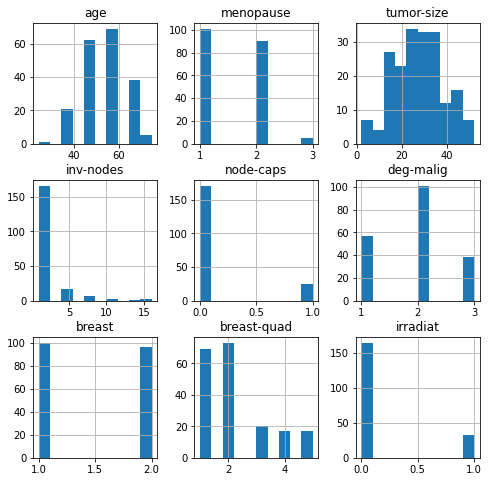

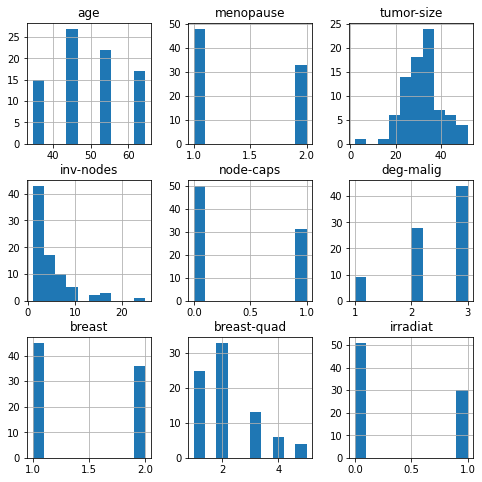

In [ ]:
df.groupby('Class').hist(figsize=(8, 8))

###We aim to classify the patients' data into two classes: **"no-recurrence events"** and **"recurrence events"**. 
This 'Class' variable will be stored in 'y'.

In [ ]:
op = df['Class']
features_list = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
features = df[features_list]
features.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,34.5,1,32,1,0,3,1,2,0
1,44.5,1,22,1,0,2,2,3,0
2,44.5,1,22,1,0,2,1,2,0
3,64.5,2,17,1,0,2,2,1,0
4,44.5,1,2,1,0,2,2,4,0


# Performing test and train split

The dataset will be split into a training set and testing set by using **train_test_split()** function. I chose to train 80% of the data.

In [ ]:
features_train, features_test, op_train, op_test = train_test_split(features, op, test_size = 0.20, random_state = 324)
print("Number instances in features_train dataset: ", features_train.shape)
print("Number instances in op_train dataset: ", op_train.shape)
print("Number instances in features_test dataset: ", features_test.shape)
print("Number instances in op_test dataset: ", op_test.shape)

Number instances in features_train dataset:  (221, 9)
Number instances in op_train dataset:  (221,)
Number instances in features_test dataset:  (56, 9)
Number instances in op_test dataset:  (56,)


From the diagram below, we can see that the dataset is **imbalanced**. So I will be performing resampling in the following section, using **oversampling** method.

Text(0, 0.5, 'Frequency')

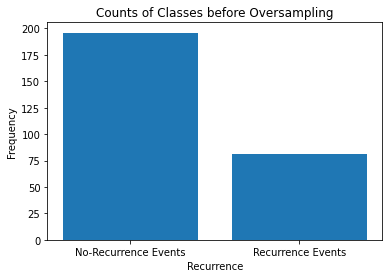

In [ ]:
# count the occurrence of each class 
fig, ax = plt.subplots()
data = df['Class'].value_counts() 
event = ['No-Recurrence Events','Recurrence Events']
frequency = data.values  
ax.bar(event, frequency) 
ax.set_title('Counts of Classes before Oversampling') 
ax.set_xlabel('Recurrence') 
ax.set_ylabel('Frequency')

# Resampling (oversampling)


### Resampling should be done after splitting. It should be applied only to training set, not to testing set.

Before OverSampling, the shape of features_X: (221, 9)
Before OverSampling, the shape of op_y: (221,) 

Before OverSampling, counts of No-Recurrent Class '0': 159 

Before OverSampling, counts of Recurrent Class '1': 62


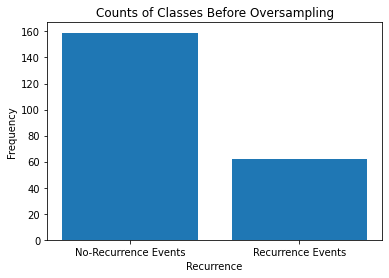

In [ ]:
fig, ax = plt.subplots() 
x = (int(sum(op_train==0)))
y = (int(sum(op_train==1)))

data = [x,y]
event = ['No-Recurrence Events','Recurrence Events']
ax.bar(event, data) 
ax.set_title('Counts of Classes Before Oversampling') 
ax.set_xlabel('Recurrence') 
ax.set_ylabel('Frequency')

print('Before OverSampling, the shape of features_X: {}'.format(features_train.shape))
print('Before OverSampling, the shape of op_y: {} \n'.format(op_train.shape))

print("Before OverSampling, counts of No-Recurrent Class '0': {} \n".format(sum(op_train==0)))
print("Before OverSampling, counts of Recurrent Class '1': {}".format(sum(op_train==1)))

To perform oversampling in order to handle imbalanced data, I will be using **Synthetic Minority Oversampling Technique (SMOTE)**, which duplicates examples in the minority class.

In [ ]:
sm = SMOTE(random_state=2)
features_train_res, op_train_res = sm.fit_sample(features_train, op_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of features_X: (318, 9)
After OverSampling, the shape of op_y: (318,) 

After OverSampling, counts of Recurrent Class '1': 159
After OverSampling, counts of Non-Recurrent Class '0': 159


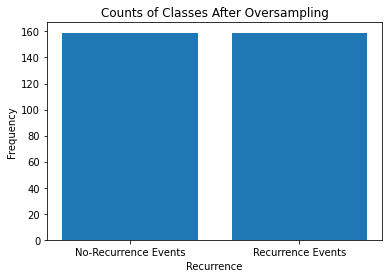

In [ ]:
fig, ax = plt.subplots() 
x = (int(sum(op_train_res==0)))
y = (int(sum(op_train_res==1)))

data = [x,y]
event = ['No-Recurrence Events','Recurrence Events']
ax.bar(event, data) 
ax.set_title('Counts of Classes After Oversampling') 
ax.set_xlabel('Recurrence') 
ax.set_ylabel('Frequency')

print('After OverSampling, the shape of features_X: {}'.format(features_train_res.shape))
print('After OverSampling, the shape of op_y: {} \n'.format(op_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(op_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(op_train_res==0)))

Now we can see that the data has been balanced, with each class consisting of the same number of counts.

# Fitting and Testing

## Decision Tree Classifier

---




In [ ]:
recurrence_classifier = DecisionTreeClassifier(max_leaf_nodes = 19, random_state=0, min_impurity_split = 0)
recurrence_classifier.fit(features_train_res, op_train_res)
ModelPredictions = recurrence_classifier.predict(features_test)
accuracy_score(y_true = op_test, y_pred = ModelPredictions)
confusion_matrix(y_true = op_test, y_pred = ModelPredictions)
print(classification_report(y_true = op_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.67      0.63      0.65        19

    accuracy                           0.77        56
   macro avg       0.74      0.73      0.74        56
weighted avg       0.77      0.77      0.77        56



/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


In [ ]:
recurrence_classifier = DecisionTreeClassifier(max_leaf_nodes = 19, random_state = 0, min_impurity_split = 0.2)
recurrence_classifier.fit(features_train_res, op_train_res)
ModelPredictions = recurrence_classifier.predict(features_test)
accuracy_score(y_true = op_test, y_pred = ModelPredictions)
confusion_matrix(y_true = op_test, y_pred = ModelPredictions)
print(classification_report(y_true = op_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.62      0.53      0.57        19

    accuracy                           0.73        56
   macro avg       0.70      0.68      0.69        56
weighted avg       0.72      0.73      0.73        56



/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


## Random Forest Algorithm

In [ ]:
recurrence_classifier = RandomForestClassifier(n_estimators = 50, random_state = 10, min_samples_leaf=1)
recurrence_classifier.fit(features_train_res, op_train_res)
ModelPredictions = recurrence_classifier.predict(features_test)

accuracy_score(y_true = op_test, y_pred = ModelPredictions)
confusion_matrix(y_true = op_test, y_pred = ModelPredictions)
print(classification_report(y_true = op_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.65      0.58      0.61        19

    accuracy                           0.75        56
   macro avg       0.72      0.71      0.71        56
weighted avg       0.74      0.75      0.75        56



In [ ]:
recurrence_classifier = RandomForestClassifier(n_estimators = 30, random_state = 10, min_samples_leaf=1)
recurrence_classifier.fit(features_train_res, op_train_res)
ModelPredictions = recurrence_classifier.predict(features_test)

accuracy_score(y_true = op_test, y_pred = ModelPredictions)
confusion_matrix(y_true = op_test, y_pred = ModelPredictions)
print(classification_report(y_true = op_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        37
           1       0.58      0.58      0.58        19

    accuracy                           0.71        56
   macro avg       0.68      0.68      0.68        56
weighted avg       0.71      0.71      0.71        56

